(c) 2024 Manuel Razo. This work is licensed under a [Creative Commons
Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/).
All code contained herein is licensed under an [MIT
license](https://opensource.org/licenses/MIT).

In [1]:
# Import project package
import ActiveInference as AI

# Import basic math
import LinearAlgebra

# Load plotting-related packages
using CairoMakie
import ColorSchemes
import Colors

# Activate backend
CairoMakie.activate!()

# Set Plotting style
AI.viz.theme_makie!()

# The Ising model

Ising models are a simple model of ferromagnetism. The model consists of an
array of spins that can be in one of two states, up or down (or +1 or -1). The
spins are magnetically coupled to their neighbors with two possible types of
couplings: 
- ferromagnetic (like spins want to align) or 
- antiferromagnetic (like spins want to anti-align).

Let the state $\underline{x}$ of an ising model with $N$ spins be a vector in
which each element $x_n$ is the state of the $n$-th spin. If two spins are
neighbors, we write $(m, n) \in \mathcal{N}$. The coupling energy for a pair of
spins is defined as
$$
J_{mn} = \begin{cases}
J & \text{if } (m, n) \in \mathcal{N}\\
0 & \text{otherwise}
\end{cases}.
\tag{1}
$$
The energy of any state $\underline{x}$, also called the Hamiltonian, is defined
as
$$
E(\underline{x}; J, H) = - \frac{1}{2} \left[
    \sum_{m, n} J_{mn} x_m x_n + h \sum_n x_n,
\right],
\tag{2}
$$
where $h$ is an externally applied field. If $J > 0$ the model is ferromagnetic,
and if $J < 0$ the model is antiferromagnetic. The $1/2$ factor comes from the
double counting of the energy of each pair of spins, once as $(m, n)$ and once
as $(n, m)$. At equilibrium temperature $T$, the probability of a state
$\underline{x}$ is given by the Boltzmann distribution
$$
P(\underline{x} \mid \beta, J, h) = \frac{1}{\mathcal{Z}} \exp\left(
    -\beta E(\underline{x}; J, h)
\right),
\tag{3}
$$
where $\beta = 1 / k_B T$ is the inverse temperature, and $\mathcal{Z}$ is the
partition function, defined as
$$
\mathcal{Z} = \sum_{\underline{x}} \exp\left(
    -\beta E(\underline{x}; J, h)
\right).
\tag{4}
$$

## Exact computation of the partition function

Evaluating properties of the Ising model can be challenging because the
partition function $\mathcal{Z}$ in Eq. (4) can be prohibitely expensive to
evaluate even for a small number of spins. For example, for a $10 \times 10$
lattice, there are $2^{100} \approx 10^{30}$ possible states. This is a number
larger than the number of atoms in the universe!

Luckily, there are methods to calculate the partition function for these simple
Ising models. In particular, the so-called **transfer matrix method** allows us
to convert the difficult sum to compute the partition function into an
Eigenvalue problem. The idea is the following: We would like to define a matrix
$\underline{\underline{M}}$ such that the partition function is related to its
trace.

Specifically, for our 2D square lattice, we define a "super-spin" $s_i$ as the
spins on a column of the lattice as depicted in the figure below.

![](./figs/ising_rows.png)

The partition function of this can then be written as
$$
\begin{aligned}
\mathcal{Z} &= \sum_{\underline{x}} \exp\left(
    -\beta E(\underline{x})
\right),\\
&= \sum_{s_1} \sum_{s_2} \cdots \sum_{s_C} \exp\left(
    -\beta \sum_{c=1}^C \mathcal{E}(s_c, s_{c+1})
\right).
\end{aligned}
\tag{5}
$$
Let's dissect each term in this sum. first we have
$$
\sum_{s_1}.
\tag{6}
$$
That is the sum over all the possible states of the first column. In our 
schematic above with 3 spins per column, there are $2^3 = 8$ possible states.
Next, we have 
$$
\sum_{s_1} \sum_{s_2} \cdots \sum_{s_C}.
\tag{7}
$$
This is taking the sum over all possible states of each of the $C$ columns. This
sum is equivalent to summing over all possible states of the lattice. In the
exponential term, we have
$$
\sum_{c=1}^C \mathcal{E}(s_c, s_{c+1}).
\tag{8}
$$
which is a sum over the energy of the interactions between spins in adjacent
columns (using periodic boundary conditions, i.e., for $s_C$, we have $s_{C+1} =
s_1$). The energy term $\varepsilon$ is an approprietly defined function. In
our square lattice case *with no external field*, we have
$$
\mathcal{E}\left(s_c, s_{c+1}\right)
= \sum_{\substack{(m, n) \in \mathcal{N}: \\ m \in c, n \in c+1}} J x_m x_n +
\frac{1}{4} \sum_{\substack{(m, n) \in \mathcal{N}: \\ m \in c, n \in c}} 
J x_m x_n + 
\frac{1}{4} \sum_{\substack{(m, n) \in \mathcal{N}: \\ m \in c+1, n \in c+1}} 
J x_m x_n .
\tag{9}
$$
The first term sums the interactions between spins in adjacent columns. The
second and third terms sum the interactions between spins in the same column.
The factor of $1/4$ comes from the fact that each spin is counted twice in the
column sum and twice when summing the interactions between columns. Notice this
quantity is not the exact energy of the system---for example, there is no 
negative sign in front of the energy term. However, this term is whant is
required for the transfer matrix method to work.

Our transfer matrix $\underline{\underline{M}}$ then captures the intereactions
between two adjacent columns. This matrix is then of size $2^w \times 2^w$,
where $w$ is the number of spins per column. The matrix
$\underline{\underline{M}}$ is then defined to have entries of the form
$$
M_{ss'} = \exp\left(
    -\beta \mathcal{E}(s, s')
\right).
\tag{10}
$$

Given this definition, the partition function for a lattice with $C$ columns is
then given by
$$
\begin{aligned}
\mathcal{Z} 
&= \text{Tr}\left(
    \underline{\underline{M}}^C
\right),\\
&= \sum_{i=1}^{2^w} \lambda_i^C,
\end{aligned}
\tag{11}
$$
where $\text{Tr}$ is the trace of the matrix, and $\lambda_i$ are the
eigenvalues of the matrix $\underline{\underline{M}}$.

Thus, to get an exact computation of the partition function, we first need to
define a function that computes the $\mathcal{E}$ term. Then, a function that
builds the transfer matrix $\underline{\underline{M}}$. Finally, we can obtain
the eigenvalues of this matrix and compute the partition function.

Let's begin by defining the function that computes the energy term
$\mathcal{E}$. First, we define a function that for a given number of spins per
row $w$, returns all possible states of a column.

In [7]:
@doc raw"""
    generate_spin_states(N::Int)

Generate all possible spin states for a 1D system of N spins.

# Arguments
- `N`: the number of spins in the system.

# Returns
- A 2D array of size N x 2^N, where each column represents a possible spin
  state. Each element is +1 or -1, representing spin up or spin down,
  respectively.

# Notes
- The function generates all 2^N possible states of the system by looping over
  the integers from 0 to 2^N - 1 and converting each integer to its binary
  representation. The binary representation is then converted to spin states,
  with 0 representing spin down (-1) and 1 representing spin up (+1).
"""
function generate_spin_states(N::Int)
    # Define the number of states
    num_states = 2^N
    # Initialize array to store the spin states
    states = Array{Int8,2}(undef, N, num_states)

    # Loop through each state
    for i in 0:(num_states-1)
        # Store the binary representation of the state
        binary = bitstring(i)
        # Loop through each spin
        for j in 1:N
            # Convert the binary representation to spin states
            states[j, i+1] = (
                j <= length(binary) && binary[end-j+1] == '1'
            ) ? 1 : -1
        end # for j
    end # for i

    return states
end

generate_spin_states

Let's test this function by computing the possible states for a column of 3
spins.

In [3]:
# Define the number of spins
N = 3
# Compute the spin states
states = generate_spin_states(N)

3×8 Matrix{Int8}:
 -1   1  -1   1  -1   1  -1  1
 -1  -1   1   1  -1  -1   1  1
 -1  -1  -1  -1   1   1   1  1

Next, let's define a function that generates a $2^w \times 2^w$ matrix where the
entries are the states of two adjacent columns.

In [8]:
@doc raw"""
    generate_pair_matrix(n_row::Int)

Generate a matrix of all possible pairs of column states for a rectangular
lattice of spins.

# Arguments
- `n_row`: the number of rows in the lattice.

# Returns
- A 2D array of matrices, where each matrix represents a pair of column states.
  Each element in the matrices is +1 or -1, representing spin up or spin down,
  respectively.

# Notes
- The function first generates all possible column states using the
  `generate_spin_states` function. Each column state is a vector of length
  `n_row`, where each element is a spin.
- It then creates a matrix where each element is a pair of column states. The
  pairs are generated by taking all possible combinations of the column states.
- The pair of column states is represented as a matrix where the first column is
  the first state and the second column is the second state.
"""
function generate_pair_matrix(n_row::Int)
    # Generate possible column states
    states = generate_spin_states(n_row)

    # Get number of column states
    num_states = size(states, 2)

    # Initialize pair matrix to store all possible pair of column states
    pair_matrix = Array{Matrix{Int8}}(undef, num_states, num_states)

    # Loop through rows
    for i in 1:num_states
        # Loop through columns
        for j in 1:num_states
            # Generate pair of column states
            pair_matrix[i, j] = hcat(states[:, i], states[:, j])
        end # for j
    end # for i

    return pair_matrix
end

generate_pair_matrix

Let's test this function again for a 3-spin column.

In [9]:
# Define the number of spins
N = 3
# Generate the pair matrix
pair_matrix = generate_pair_matrix(N)

8×8 Matrix{Matrix{Int8}}:
 [-1 -1; -1 -1; -1 -1]  [-1 1; -1 -1; -1 -1]  …  [-1 1; -1 1; -1 1]
 [1 -1; -1 -1; -1 -1]   [1 1; -1 -1; -1 -1]      [1 1; -1 1; -1 1]
 [-1 -1; 1 -1; -1 -1]   [-1 1; 1 -1; -1 -1]      [-1 1; 1 1; -1 1]
 [1 -1; 1 -1; -1 -1]    [1 1; 1 -1; -1 -1]       [1 1; 1 1; -1 1]
 [-1 -1; -1 -1; 1 -1]   [-1 1; -1 -1; 1 -1]      [-1 1; -1 1; 1 1]
 [1 -1; -1 -1; 1 -1]    [1 1; -1 -1; 1 -1]    …  [1 1; -1 1; 1 1]
 [-1 -1; 1 -1; 1 -1]    [-1 1; 1 -1; 1 -1]       [-1 1; 1 1; 1 1]
 [1 -1; 1 -1; 1 -1]     [1 1; 1 -1; 1 -1]        [1 1; 1 1; 1 1]

Let's look at one of the entries of this matrix to make sure it is correct.

In [10]:
pair_matrix[1, 7]

3×2 Matrix{Int8}:
 -1  -1
 -1   1
 -1   1

With these functions in hand, we can now compute the energy of a pair of columns
as indicated by Eq. (9).

In [11]:
@doc raw"""
    ε_rectangular(pair_state::AbstractMatrix; J::T=1.0) where {T<:Number}

Calculate the energy of two column states in the Ising model on a rectangular
lattice. This is the energy term used to build the transition matrix.

# Arguments
- `pair_state`: a 2D array representing the spin configuration of the lattice.
  Each element is +1 or -1, representing spin up or spin down, respectively.

# Optional Keyword Arguments
- `J`: the coupling constant in the Ising model. It determines the strength of
  the interaction between neighboring spins. Default is 1.0.

# Returns
- The total energy of the spin configuration.

# Notes
- The function calculates the energy by summing over all pairs of neighboring
  spins. For each pair, it adds the product of the spins and the coupling
  constant to the total energy. The interaction with the right and bottom
  neighbors is considered for each spin.
- The energy is negative when neighboring spins are aligned, and positive when
  they are anti-aligned. This is because the Ising model assumes that spins
  prefer to align with their neighbors.
"""
function ε_rectangular(pair_state::AbstractMatrix; J=1.0)
    # Initialize energy to zero
    E = zero(typeof(J))
    # Add the interaction with the right neighbor
    E += sum(J .* pair_state[:, 1] .* pair_state[:, 2])
    # Add the interaction with bottom neighbor
    E += sum(J / 2 .* pair_state[1:end-1, :] .* pair_state[2:end, :])

    return E
end # function

ε_rectangular

Let's again test this function with one of the entries of our `pair_matrix`.

In [12]:
# Compute the energy of the pair state
ε_rectangular(pair_matrix[1, 1])

5.0

Now, we ar ready to define the function that builds the corresponding transfer
matrix. To reduce the number of computations, we will use the fact that the
resulting matrix is symmetric. Thus, we will only compute the lower triangle of
the matrix.

In [13]:
@doc raw"""
        transfer_matrix(n_row::Int; β::T=1.0, J::T=1.0) where {T<:Number}

Generate the transfer matrix for a rectangular lattice of spins in the Ising
model.

# Arguments
- `n_row::Int`: the number of rows in the lattice.

# Optional Keyword Arguments
- `β=1.0`: the inverse temperature in the Ising model. Default is 1.0.
- `J=1.0`: the coupling constant in the Ising model. It determines the strength
  of the interaction between neighboring spins. Default is 1.0.

# Returns
- The transfer matrix, a symmetric matrix where each element is the Boltzmann
    factor exp(-βE) of a pair of column states. E is the energy of the pair
    state, calculated using the `ε_rectangular` function.

# Notes
- The function first generates a matrix of all possible pairs of column states
  using the `generate_pair_matrix` function.
- It then calculates the energy of each pair state using the `ε_rectangular`
  function and assigns the Boltzmann factor exp(-βE) to the corresponding
  element of the transfer matrix.
- The transfer matrix is used in the transfer-matrix method, a powerful
  technique for solving statistical mechanics problems on lattices.
"""
function transfer_matrix(n_row::Int; β=1.0, J=1.0)
    # Generate pair matrix
    pair_matrix = generate_pair_matrix(n_row)

    # Get number of column states
    num_states = size(pair_matrix, 1)

    # Initialize transfer matrix
    M = Matrix{typeof(β)}(undef, num_states, num_states)

    # Loop through rows
    for i in 1:num_states
        # Loop through columns up to current row
        for j in 1:i
            # Calculate energy of pair state
            E = ε_rectangular(pair_matrix[i, j], J=J)
            # Assign energy to transfer matrix
            M[i, j] = exp(-β * E)
        end # for j
    end # for i

    # Return matrix as a symmetric matrix
    return LinearAlgebra.Symmetric(M, :L)
end # function

transfer_matrix

Let's test this function by building the transfer matrix for a 3-spin column.

In [14]:
# Define the number of spins
N = 3
# Generate the transfer matrix
M = transfer_matrix(N)

8×8 LinearAlgebra.Symmetric{Float64, Matrix{Float64}}:
 0.00673795   0.135335     0.367879  …    2.71828    1.0        2.71828
 0.135335     0.0497871    7.38906        1.0       20.0855     1.0
 0.367879     7.38906      0.367879     148.413      1.0        2.71828
 1.0          0.367879     1.0            7.38906    2.71828    0.135335
 0.135335     2.71828      7.38906        1.0        0.367879   1.0
 2.71828      1.0        148.413     …    0.367879   7.38906    0.367879
 1.0         20.0855       1.0            7.38906    0.0497871  0.135335
 2.71828      1.0          2.71828        0.367879   0.135335   0.00673795

With this matrix in hand, we can now compute the partition function by finding
the eigenvalues of the transfer matrix! Let's define a function to do this.

In [15]:
"""
    logZ_rectangular(n_row::Int, n_col::Int; β::T=1.0, J::T=1.0) where {T<:Number}

Calculate the logarithm of the partition function for a rectangular lattice of
spins in the Ising model.

# Arguments
- `n_row`: the number of rows in the lattice.
- `n_col`: the number of columns in the lattice.

# Optional Keyword Arguments
- `β`: the inverse temperature in the Ising model. Default is 1.0.
- `J`: the coupling constant in the Ising model. It determines the strength of
  the interaction between neighboring spins. Default is 1.0.

# Returns
- The logarithm of the partition function.

# Notes
- The function first generates the transfer matrix using the `transfer_matrix`
  function.
- It then computes the partition function by summing the eigenvalues of the
  transfer matrix raised to the power of the number of columns, and takes the
  logarithm of the result.
- The partition function is a key quantity in statistical mechanics. It encodes
  the statistical properties of a system in equilibrium. Its logarithm is
  related to the free energy of the system.
"""
function logZ_rectangular(
    n_row::Int, n_col::Int; β=1.0, J=1.0
)
    # Generate transfer matrix
    M = transfer_matrix(n_row, β=β, J=J)

    # Compute the partition function
    Z = sum(LinearAlgebra.eigen(M).values .^ n_col)

    return log(Z)
end

logZ_rectangular

Let's compute the partition function for a 3 by 3 lattice.

In [16]:
# Define the number of rows and columns
n_row = 3
n_col = 3

# Compute log partition function
logZ = logZ_rectangular(n_row, n_col)

println("log Partition function: ", logZ)

log Partition function: 11.336585140980842


Having the partition function, we can compute the thermodynamic properties of
the system. For example, we can compute the free energy as
$$
\mathcal{F} = -k_B T \log \mathcal{Z}.
\tag{12}
$$

Let's compute this for a range of temperatures and plot it for a 8 by eight
lattice.

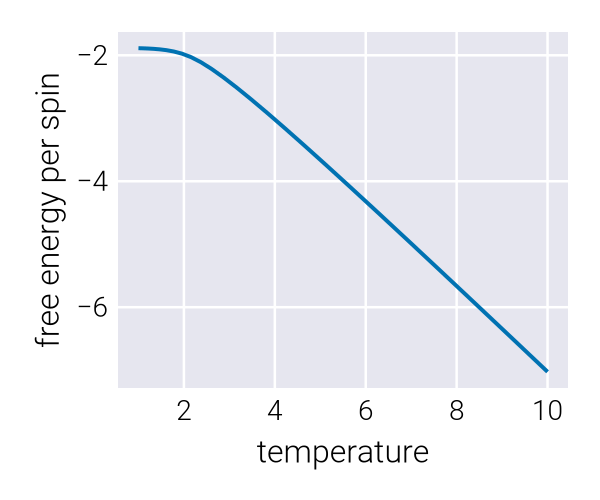

In [17]:
# Define the number of rows and columns
n_row = 8
n_col = 8

# Define kB
k = 1.0

# Define range of temperatures
T = 10 .^ range(0, 1, length=25)

# Compute inverse temperature
β = 1 ./ T

# Initialize array to save log partition function
logZ = Vector{eltype(T)}(undef, length(T))

# Loop through each temperature
Threads.@threads for i = 1:length(T)
    # Compute log partition function
    logZ[i] = logZ_rectangular(n_row, n_col; β=β[i])
end # for i

# Initialize figure
fig = Figure(size=(300, 250))

# Add axis
ax = Axis(
    fig[1, 1],
    xlabel="temperature",
    ylabel="free energy per spin",
)

# Plot free energy
lines!(ax, T, -k .* T .* logZ ./ (n_row * n_col))

fig

We can compute other properties of the system from this partition function. For
example, the entropy of the system is given by
$$
S = - \frac{\partial \mathcal{F}}{\partial T} =
- \frac{\partial}{\partial T} \left(
    -k_B T \log \mathcal{Z}
\right).
\tag{13}
$$
Using the product rule, we can write this as
$$
\begin{aligned}
S &= k_B \log \mathcal{Z} +
k_B T \frac{\partial \ln\mathcal{Z}}{\partial T}, \\
&= k_B \log \mathcal{Z} + 
k_B T \frac{\partial \log \mathcal{F}}{\partial \beta}
\frac{\partial \beta}{\partial T}.
\end{aligned}
\tag{14}
$$
Eq. 14 shows that we need the derivative of the log partition function with
respect to the inverse temperature. We can compute this derivative using a 
simple finite difference.

In [23]:
# Define number of rows and columns
n_row = n_col = 8

# Define ε value for finite difference
ε = cbrt(eps(Float64))

# Compute finite difference derivative
∂logZ∂β = (
    logZ_rectangular(n_row, n_col; β=1.0 + ε) -
    logZ_rectangular(n_row, n_col; β=1.0 - ε)
) / (2 * ε)


119.56473153282569

Let's then define a function to compute the entropy as a function of the
temperature.

In [27]:
"""
    entropy_rectangular(n_row::Int, n_col::Int; β::T=1.0, J::T=1.0, k::T=1.0, ε::T=cbrt(eps(Float64))) where {T<:Number}

Calculate the entropy for a rectangular lattice of spins in the Ising model.

# Arguments
- `n_row`: the number of rows in the lattice.
- `n_col`: the number of columns in the lattice.

# Optional Keyword Arguments
- `β`: the inverse temperature in the Ising model. Default is 1.0.
- `J`: the coupling constant in the Ising model. It determines the strength of
  the interaction between neighboring spins. Default is 1.0.
- `k`: the Boltzmann constant. Default is 1.0.
- `ε`: a small number used for finite difference approximation. Default is the
  cube root of the machine epsilon for Float64.

# Returns
- The entropy of the system.

# Notes
- The function first computes the logarithm of the partition function using the
  `logZ_rectangular` function.
- It then computes the derivative of the logarithm of the partition function
  with respect to β using a finite difference approximation.
- The entropy is then calculated using the formula S = k * logZ + k * β *
  ∂logZ∂β, where S is the entropy, k is the Boltzmann constant, logZ is the
  logarithm of the partition function, β is the inverse temperature, and ∂logZ∂β
  is the derivative of logZ with respect to β.
"""
function entropy_rectangular(
    n_row::Int, n_col::Int; β=1.0, J=1.0, k=1.0, ε=cbrt(eps(Float64))
)
    # Compute log partition function
    logZ = logZ_rectangular(n_row, n_col; β=β, J=J)

    # Compute finite difference derivative of log partition function with
    # respect to β
    ∂logZ∂β = (
        logZ_rectangular(n_row, n_col; β=β + ε) -
        logZ_rectangular(n_row, n_col; β=β - ε)
    ) / (2 * ε)

    # Compute entropy
    S = k * logZ - k * β * ∂logZ∂β

    return S
end

entropy_rectangular

Let's compute the entropy for a range of temperatures and plot it for a 8 by 8.

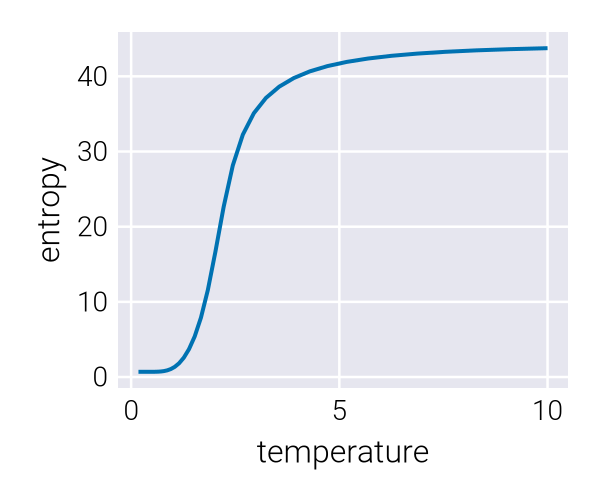

In [30]:
# Define the number of rows and columns
n_row = 8
n_col = 8

# Define range of temperatures
T = 10 .^ range(-1, 1, length=50)

# Compute inverse temperature
β = 1 ./ T

# Initialize array to save entropy
S = Vector{eltype(T)}(undef, length(T))

# Loop through each temperature
Threads.@threads for i = 1:length(T)
    # Compute log partition function
    S[i] = entropy_rectangular(n_row, n_col; β=β[i])
end # for i

# Initialize figure
fig = Figure(size=(300, 250))

# Add axis
ax = Axis(
    fig[1, 1],
    xlabel="temperature",
    ylabel="entropy",
)

# Plot free energy
lines!(ax, T, S)

fig

Finally, let's compute the heat capacity of the system. The heat capacity is
given by
$$
C = \frac{\partial \left\langle E \right\rangle}{\partial T} =
\frac{\partial}{\partial T} \left(
    - \frac{\partial \log \mathcal{Z}}{\partial \beta}
\right) =
\frac{\partial \beta}{\partial T} 
\frac{\partial^2 \log \mathcal{Z}}{\partial \beta^2}.
\tag{15}
$$

This computation requires a second order derivative of the partition function,
which can also be computed using a finite difference.

In [31]:
@doc raw"""
    heat_capacity_rectangular(n_row::Int, n_col::Int; β::T=1.0, J::T=1.0, k::T=1.0, ε::T=cbrt(eps(Float64))) where {T<:Number}

Calculate the heat capacity for a rectangular lattice of spins in the Ising
model.

# Arguments
- `n_row`: the number of rows in the lattice.
- `n_col`: the number of columns in the lattice.

# Optional Keyword Arguments
- `β`: the inverse temperature in the Ising model. Default is 1.0.
- `J`: the coupling constant in the Ising model. It determines the strength of
  the interaction between neighboring spins. Default is 1.0.
- `k`: the Boltzmann constant. Default is 1.0.
- `ε`: a small number used for finite difference approximation. Default is the
  cube root of the machine epsilon for Float64.

# Returns
- The heat capacity of the system.

# Notes
- The function first computes the second derivative of the logarithm of the
  partition function with respect to β using a finite difference approximation.
- The heat capacity is then calculated using the formula C = k * β^2 *
  ∂²logZ∂β², where C is the heat capacity, k is the Boltzmann constant, β is the
  inverse temperature, and ∂²logZ∂β² is the second derivative of logZ with
  respect to β.
"""
function heat_capacity_rectangular(n_row::Int, n_col::Int; β=1.0, J=1.0, k=1.0, ε=cbrt(eps(Float64)))
    # Compute second order derivative of log partition function with respect to
    # β
    ∂²logZ∂β² = (
        logZ_rectangular(n_row, n_col; β=β + ε) -
        2 * logZ_rectangular(n_row, n_col; β=β) +
        logZ_rectangular(n_row, n_col; β=β - ε)
    ) / ε^2

    # Compute heat capacity
    C = k * β^2 * ∂²logZ∂β²

    return C
end

heat_capacity_rectangular

As before, let's plot the heat capacity as a function of temperature for a 8 by
8 lattice.

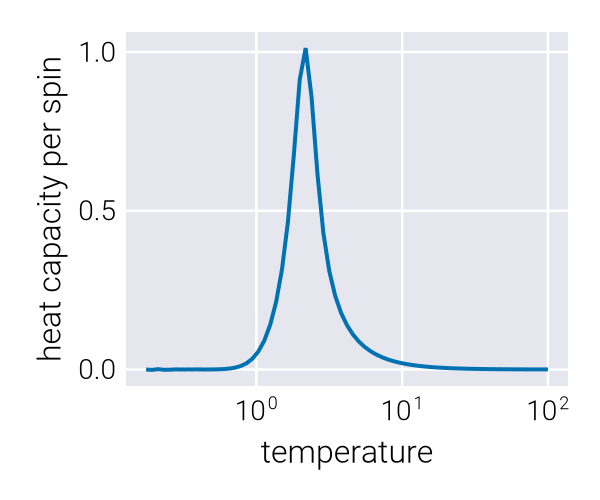

In [36]:
# Define the number of rows and columns
n_row = 8
n_col = 8

# Define range of temperatures
T = 10 .^ range(-1, 2, length=75)

# Compute inverse temperature
β = 1 ./ T

# Initialize array to save heat capacity
C = Vector{eltype(T)}(undef, length(T))

# Loop through each temperature
Threads.@threads for i = 1:length(T)
    # Compute log partition function
    C[i] = heat_capacity_rectangular(n_row, n_col; β=β[i])
end # for i

# Initialize figure
fig = Figure(size=(300, 250))

# Add axis
ax = Axis(
    fig[1, 1],
    xlabel="temperature",
    ylabel="heat capacity per spin",
    xscale=log10,
)

# Plot free energy
lines!(ax, T, C ./ (n_row * n_col))

fig

## Conclusion

In this notebook, we explore how to compute the exact partition function of an
Ising model using the so-called transfer matrix method. This method allows us to
convert the often intractable sum over all possible states of the system into an
Eigenvalue problem. 

The partition function is an essential quantity in statistical mechanics as many
thermodynamic properties can be computed from it. For example, in this notebook,
we explore how to compute the free energy, entropy, and heat capacity of the
system from the partition function.